In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import cv2
import glob as gb
import os
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from PIL import Image



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install ultralytics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.0/566.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 23.9 MB/s eta 0:00:00


In [4]:
data="/content/drive/MyDrive/500aug_yolo8/"

In [26]:
conf_thres = 0.25

In [37]:
!yolo task=detect mode=train model='/content/drive/MyDrive/500aug_yolo8/yolov8n.pt' data='/content/drive/MyDrive/500aug_yolo8/data.yaml'  epochs=100 imgsz=640 


Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/500aug_yolo8/yolov8n.pt, data=/content/drive/MyDrive/500aug_yolo8/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fals

In [43]:
tpaths2=[]
for dirname, _, filenames in os.walk('/content/runs/detect/train3'):
    for filename in filenames:
        if filename[-4:]=='.png' or filename[-4:]=='.jpg':
            tpaths2+=[(os.path.join(dirname, filename))]
tpaths2=sorted(tpaths2)
print(tpaths2[0])

/content/runs/detect/train3/F1_curve.png


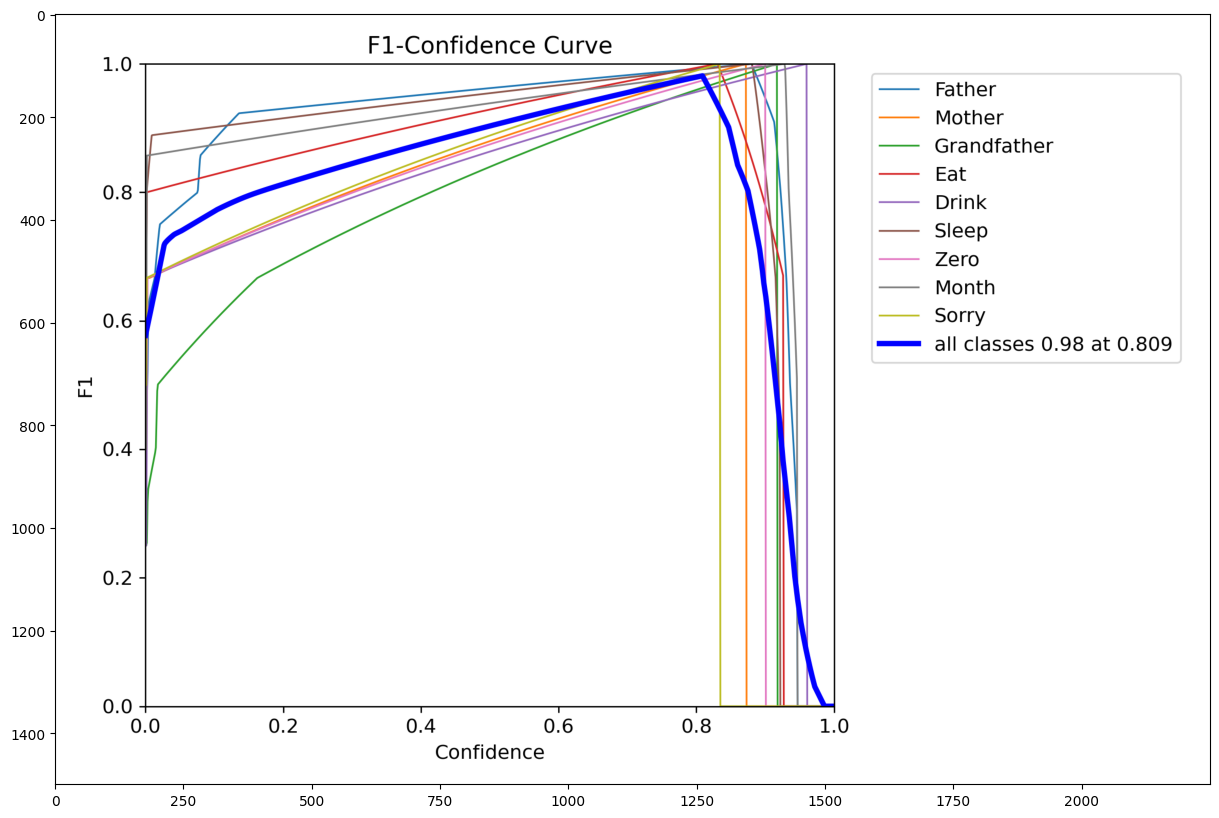

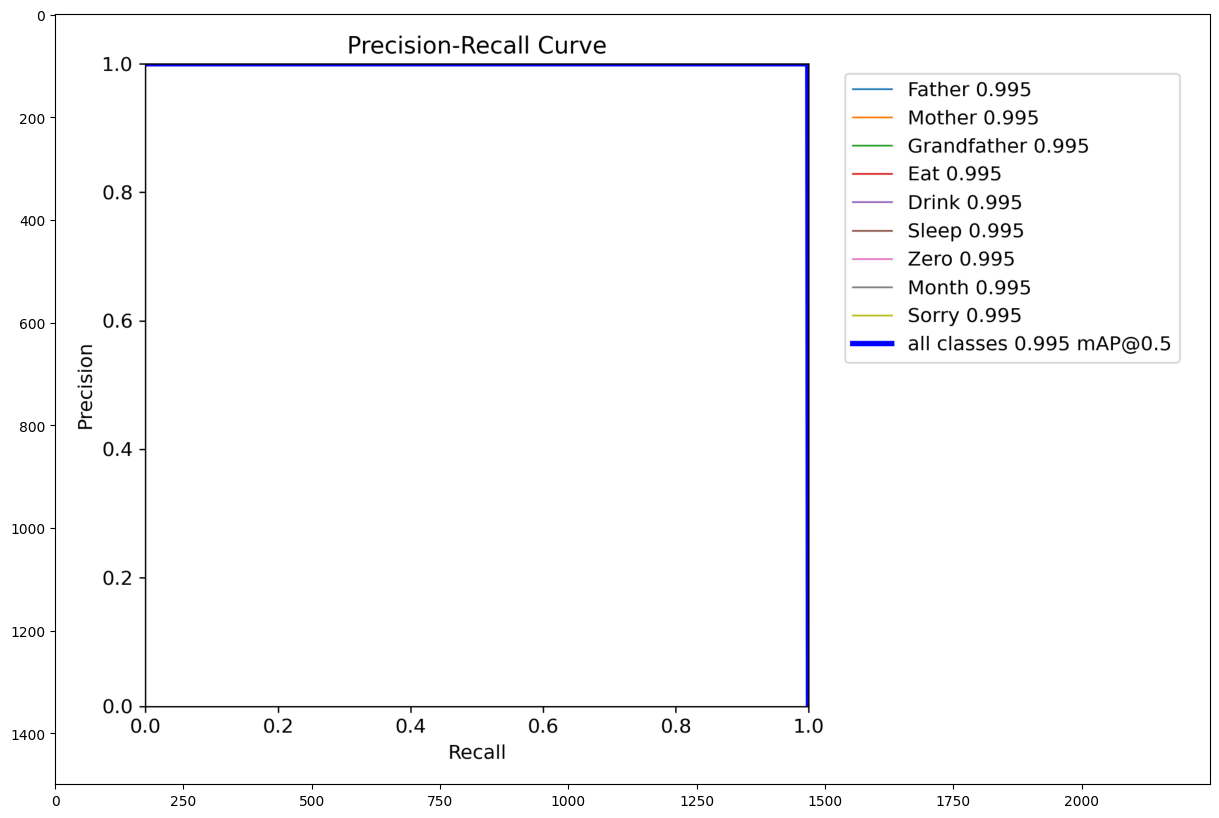

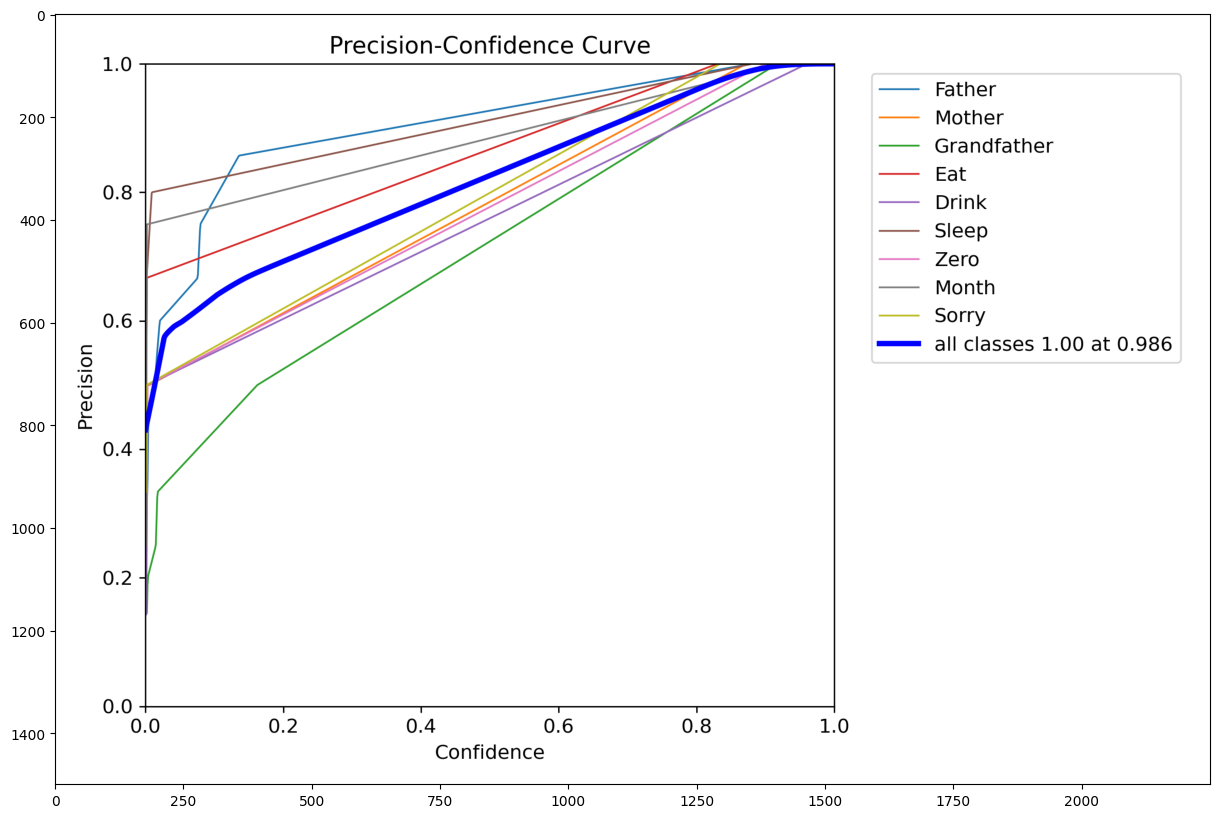

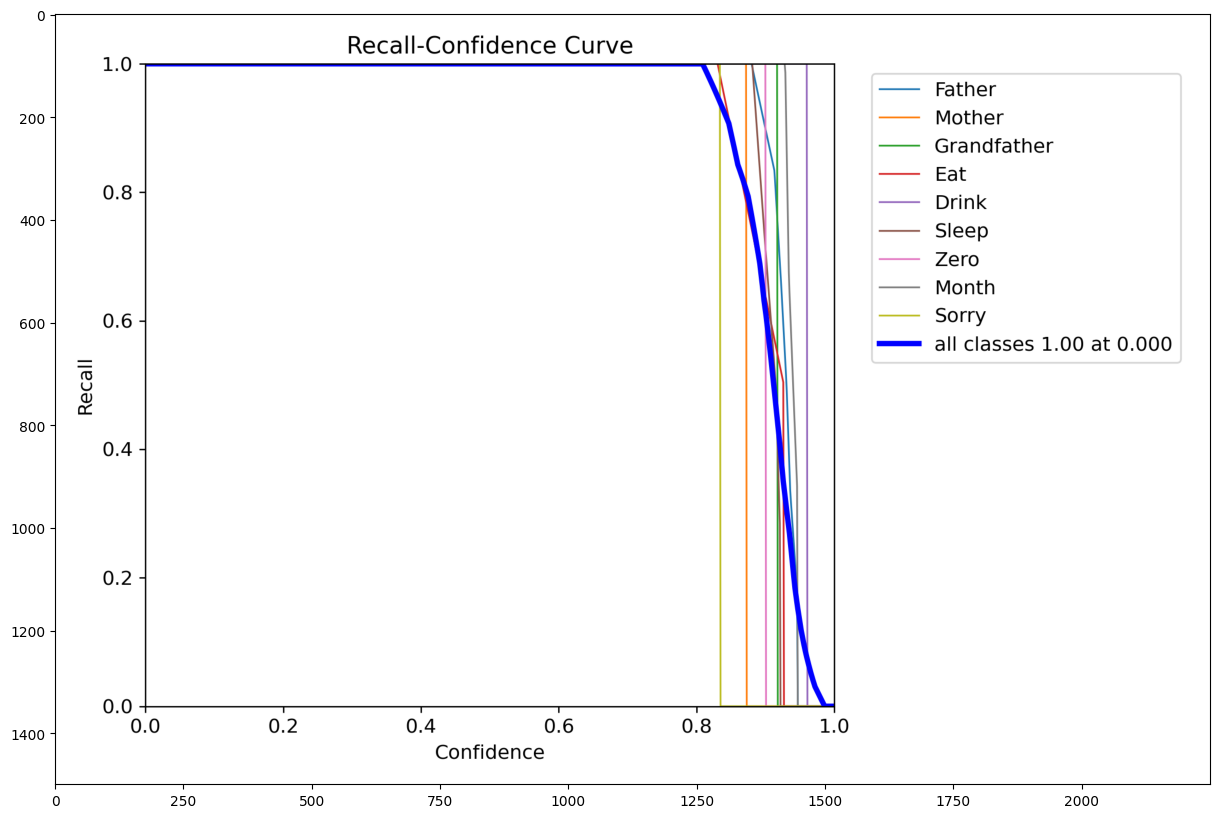

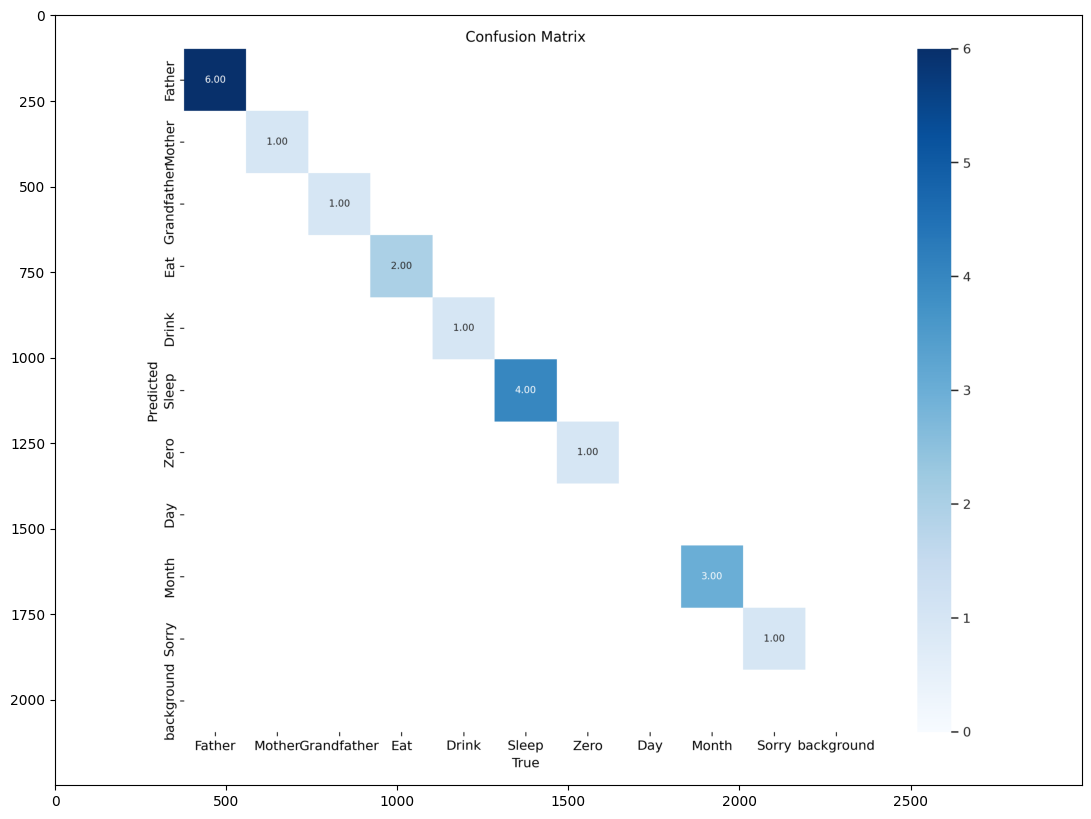

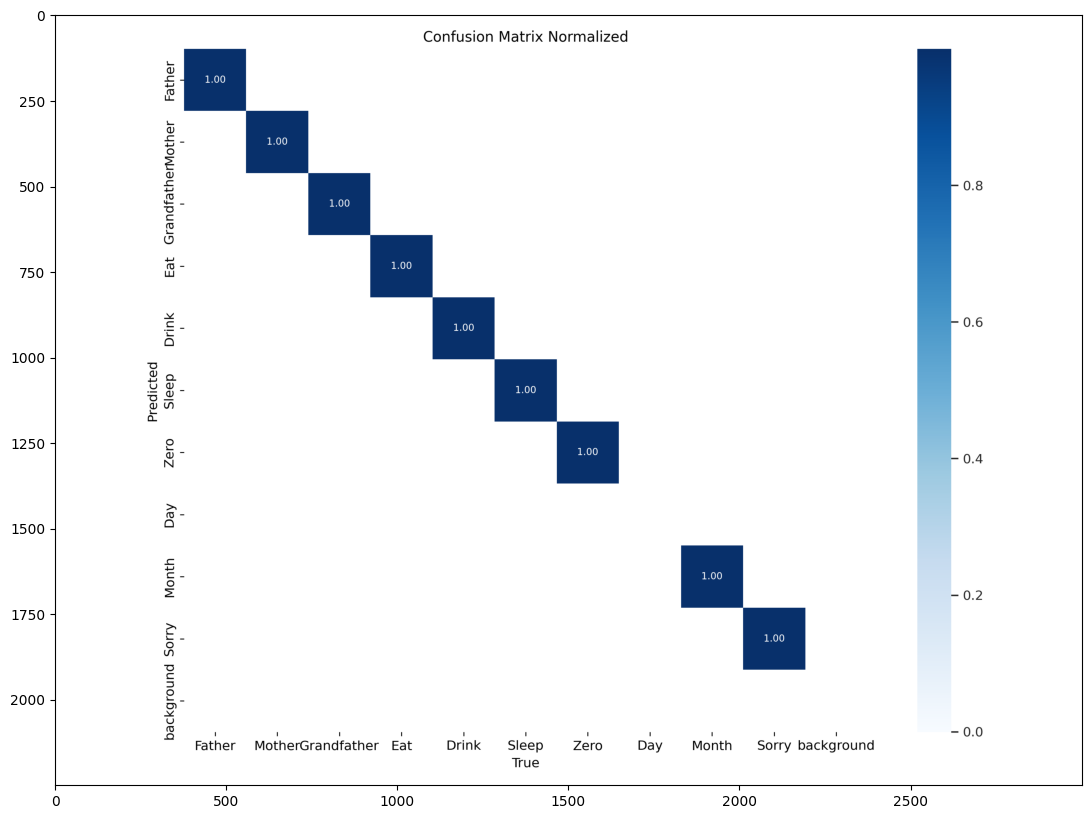

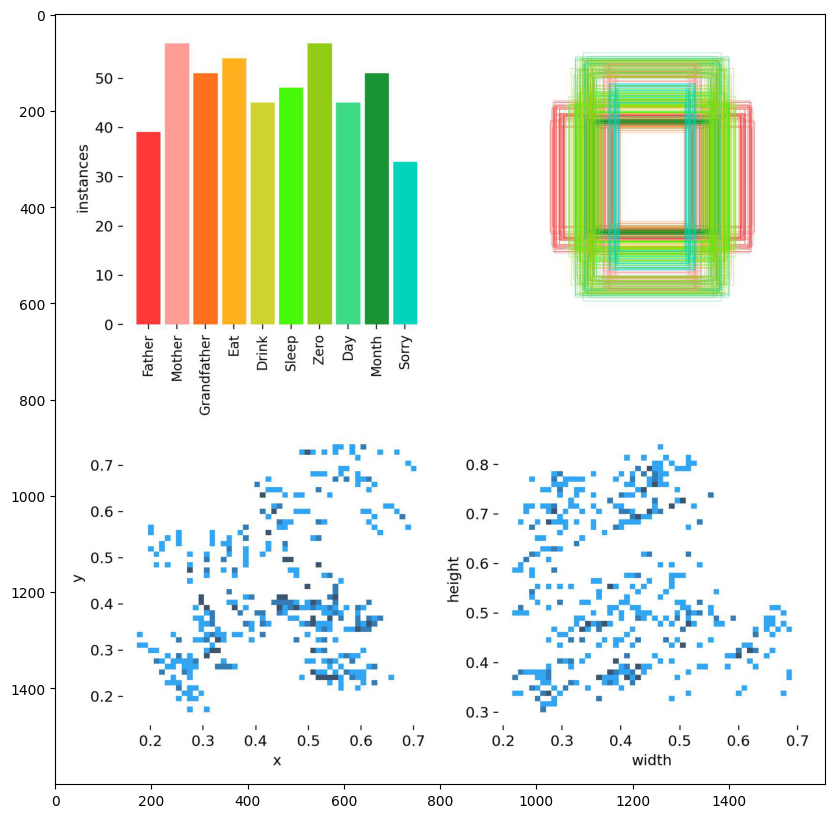

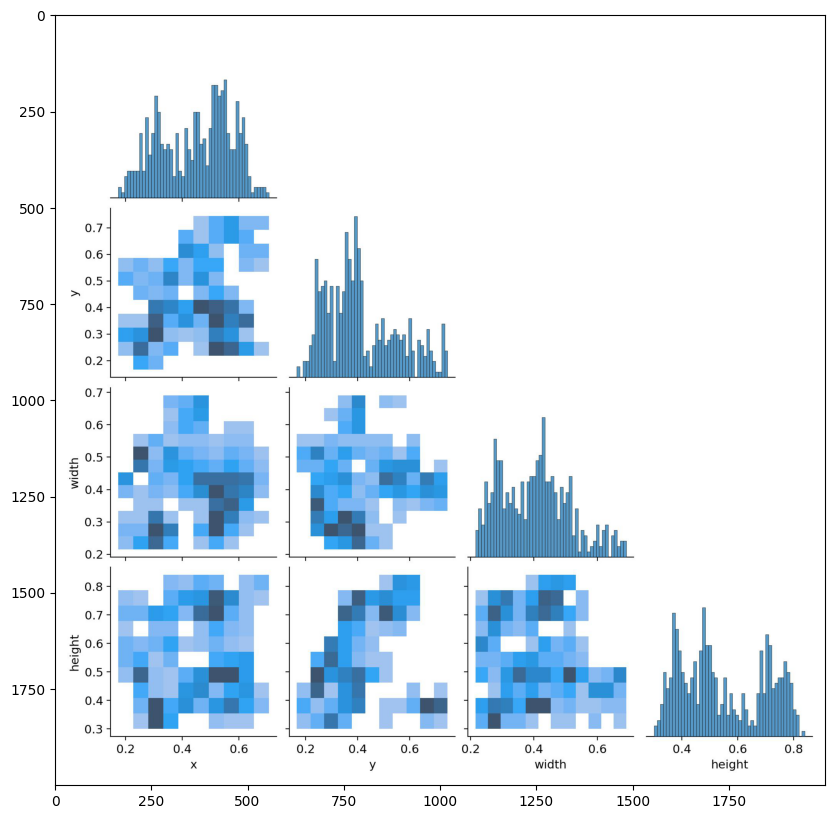

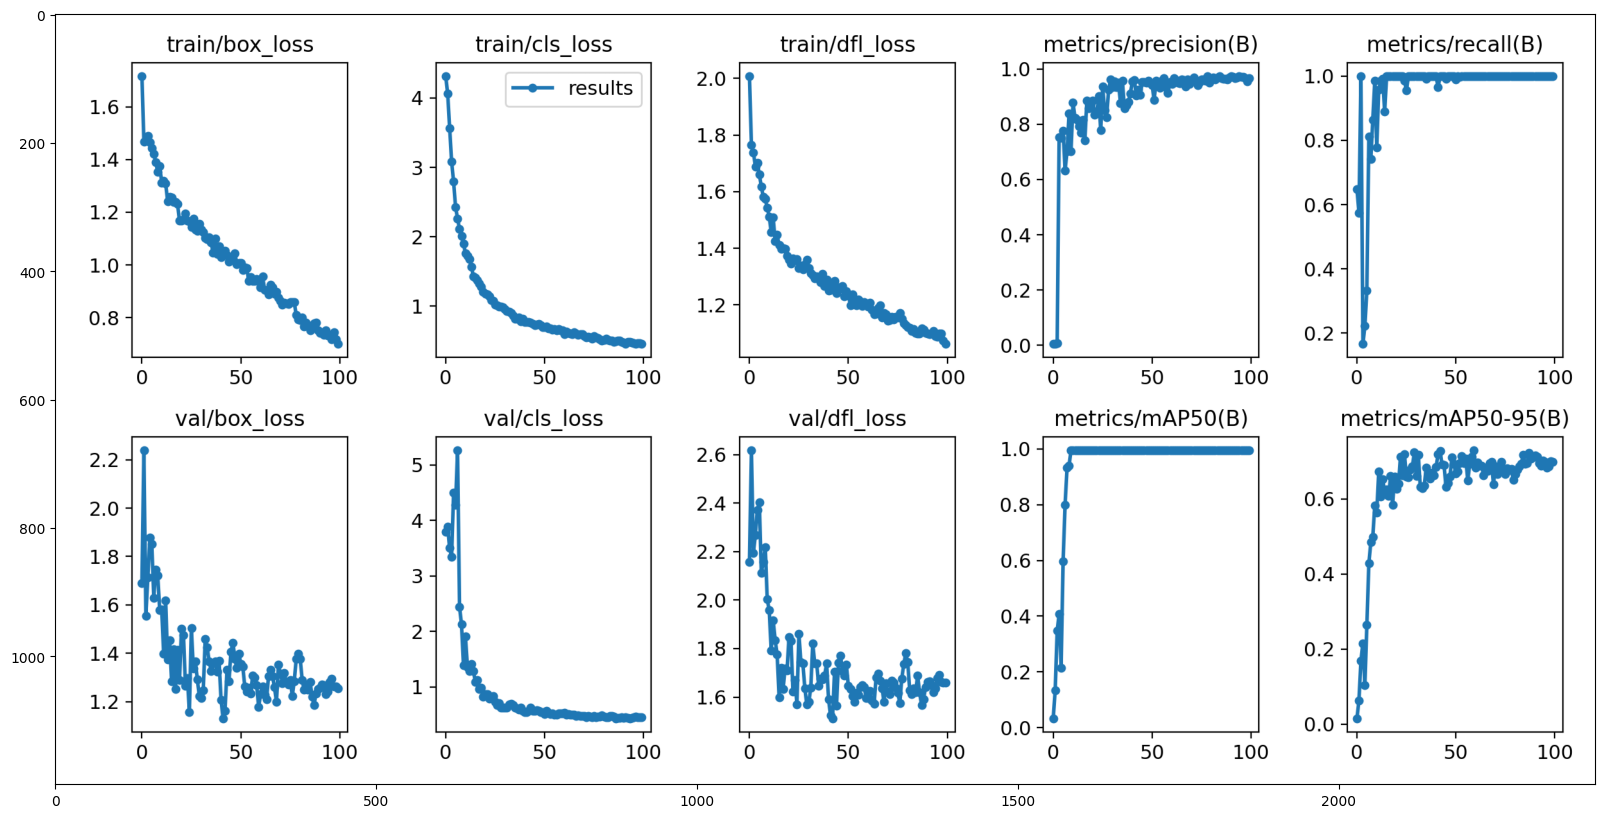

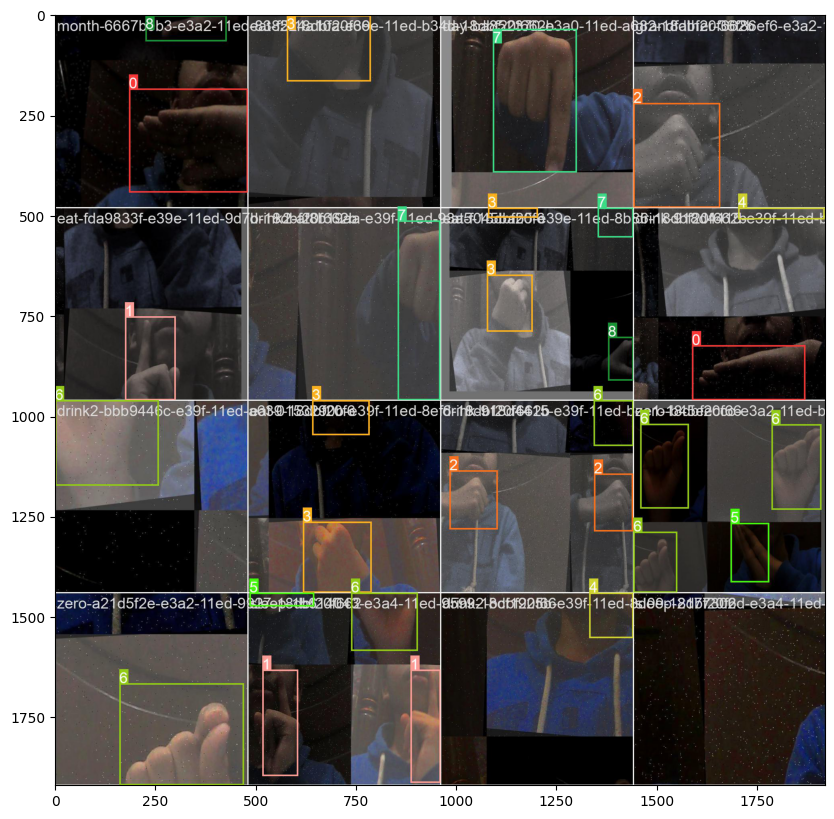

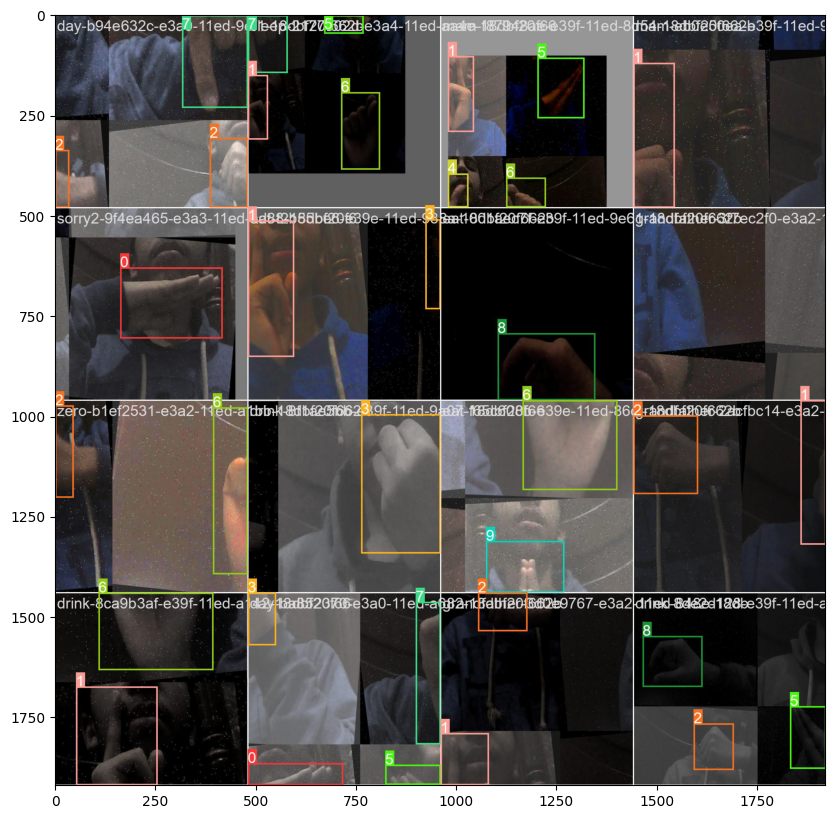

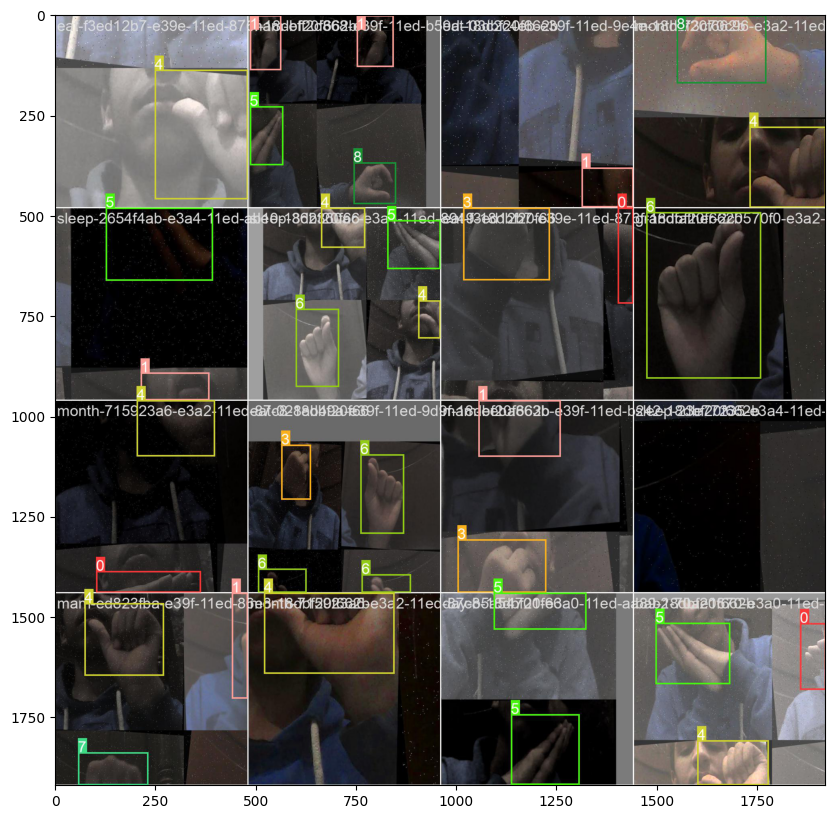

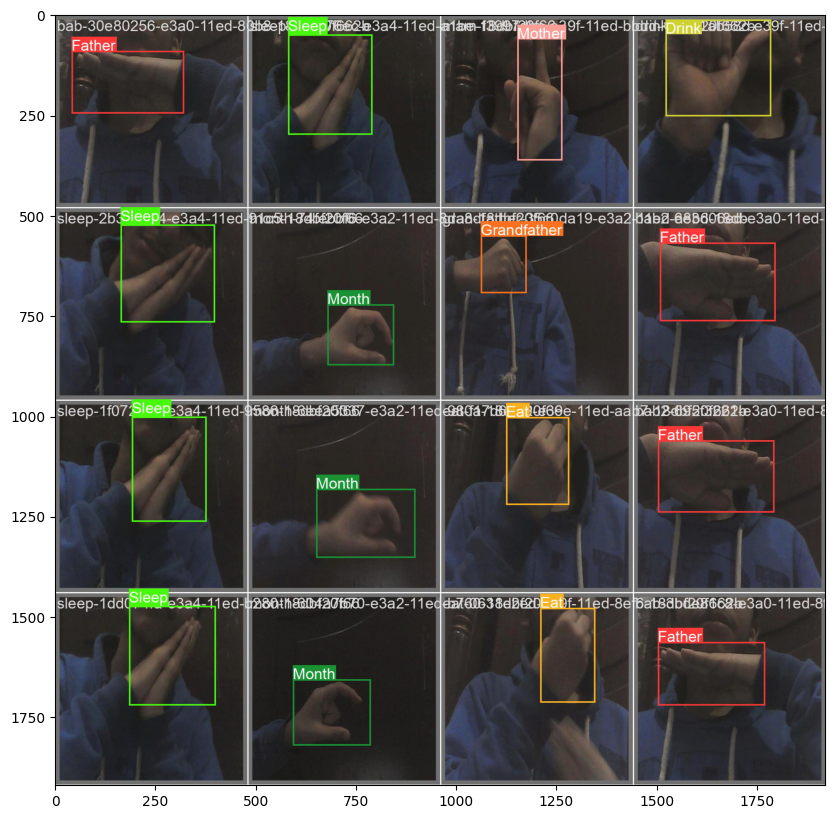

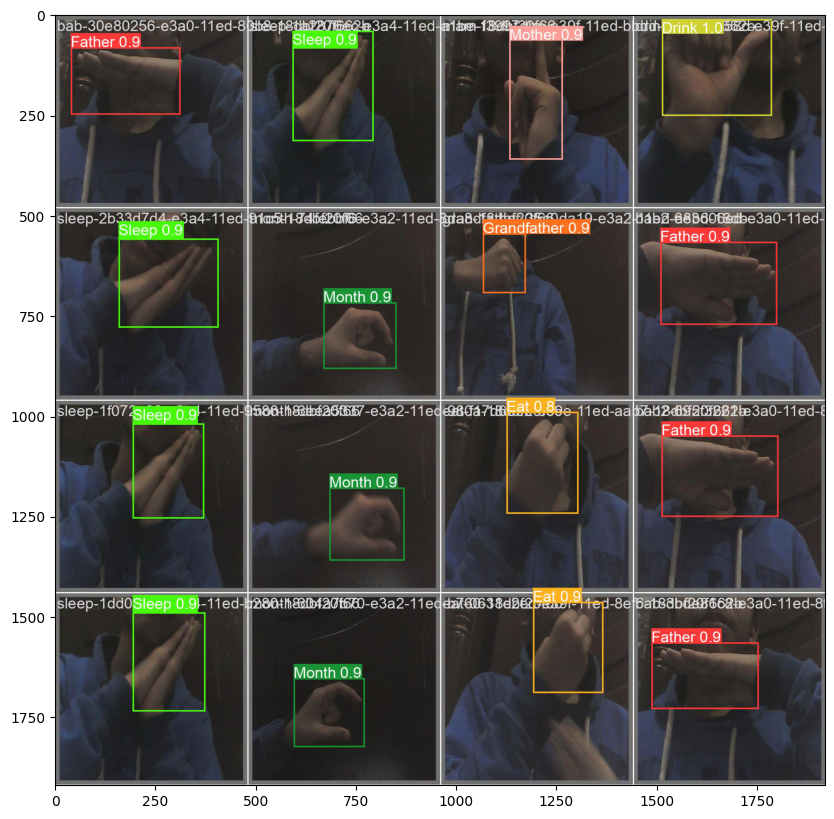

In [44]:
for path in tpaths2:
    image = Image.open(path)
    image=np.array(image)
    plt.figure(figsize=(20,10))
    plt.imshow(image)
    plt.show()

In [45]:
best_path0='/content/runs/detect/train3/weights/best.pt'
source0='/content/drive/MyDrive/500aug_yolo8/test/images/'

In [46]:
ppaths=[]
for dirname, _, filenames in os.walk(source0):
    for filename in filenames:
        ppaths+=[(os.path.join(dirname, filename))]
ppaths=sorted(ppaths)
print(ppaths[0])
print(len(ppaths))

/content/drive/MyDrive/500aug_yolo8/test/images/bab-30e80256-e3a0-11ed-80b8-18dbf20f662b_jpg.rf.5762ed348e7e758709e7da5162ccb447.jpg
20


In [47]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 23.5/166.8 GB disk)


In [48]:
model2 = YOLO(best_path0)

In [50]:
!yolo task=detect mode=predict model={best_path0} conf=0.25 source={source0}


Ultralytics YOLOv8.0.94 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/20 /content/drive/MyDrive/500aug_yolo8/test/images/bab-30e80256-e3a0-11ed-80b8-18dbf20f662b_jpg.rf.5762ed348e7e758709e7da5162ccb447.jpg: 640x640 1 Father, 6.9ms
image 2/20 /content/drive/MyDrive/500aug_yolo8/test/images/bab-37000cb0-e3a0-11ed-976c-18dbf20f662b_jpg.rf.e05ba675274c877a3410d03770c1efbf.jpg: 640x640 1 Father, 5.7ms
image 3/20 /content/drive/MyDrive/500aug_yolo8/test/images/bab-39705ff6-e3a0-11ed-b5e7-18dbf20f662b_jpg.rf.9449317000e50d158085677902169c2a.jpg: 640x640 1 Father, 5.5ms
image 4/20 /content/drive/MyDrive/500aug_yolo8/test/images/bab-3bde81c8-e3a0-11ed-8f61-18dbf20f662b_jpg.rf.a0fbbe57132ddc47d7f28232c73c9bb5.jpg: 640x640 1 Father, 5.3ms
image 5/20 /content/drive/MyDrive/500aug_yolo8/test/images/bab2-695f3221-e3a0-11ed-8770-18dbf20f662b_jpg.rf.a5b7e9f409287e6cd441b452ba97c057.jpg: